# Results analysis and visualizations

in utils_plots.py, the paths used in the functions below are defined (change is needed)

In [1]:
from utils_plots import *

### Deep Learning models’ performance decreased by the respective reference values (when full context is available) under different context sizes. 

        Score    Metric  cut_pixels        Model
55  -0.174897  Accuracy          32         Swin
55  -0.355342  Accuracy          32         MoCo
55  -0.216452  Accuracy          32       supViT
55  -0.273491  Accuracy          32          MAE
160 -0.277916  Accuracy          32     ResNet18
160 -0.200524  Accuracy          32  DenseNet121
        Score  Metric  cut_pixels        Model
58  -0.401801  Recall          32         Swin
58  -0.836925  Recall          32         MoCo
58  -0.501077  Recall          32       supViT
58  -0.607742  Recall          32          MAE
163 -0.660459  Recall          32     ResNet18
163 -0.402878  Recall          32  DenseNet121
        Score     Metric  cut_pixels        Model
57  -0.014660  Precision          32         Swin
57   0.011312  Precision          32         MoCo
57  -0.034606  Precision          32       supViT
57  -0.131016  Precision          32          MAE
162 -0.074062  Precision          32     ResNet18
162 -0.138449  Precision    

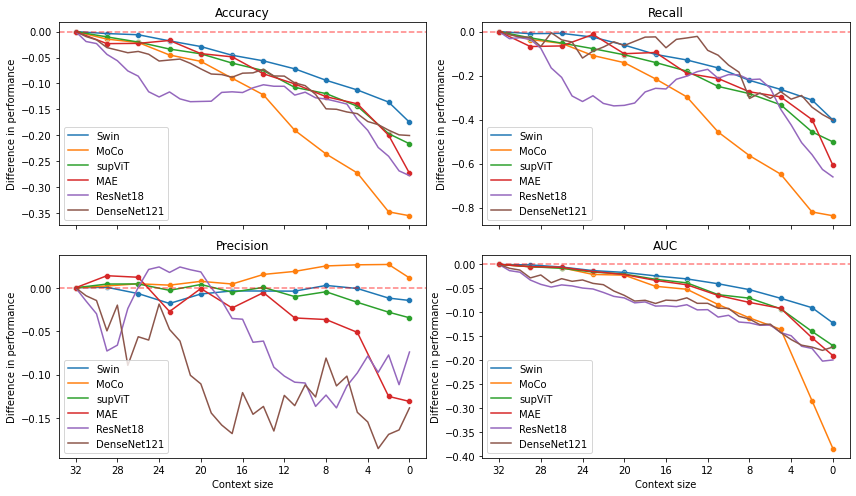

In [2]:
plot_multiple(models, False)

### Average probability at prediction type within the four categories and the numbr of images within the groups

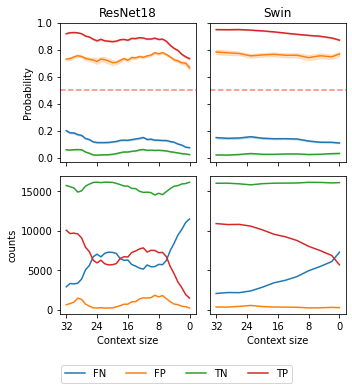

In [3]:
plot_predtypes(['resnet18-pcam', 'pcamswin']) 

### Walking change of probabilities (aggregated depending of the type of prediction shift)

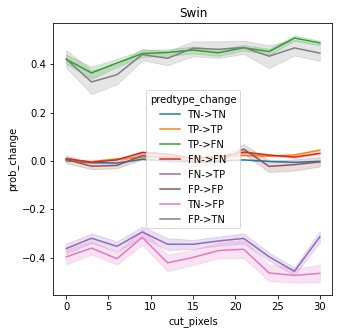

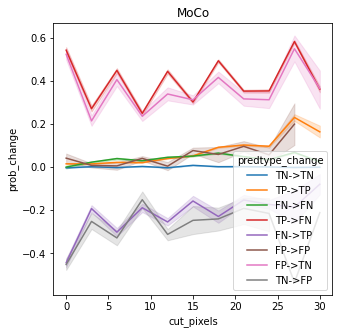

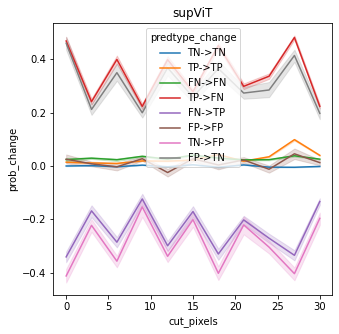

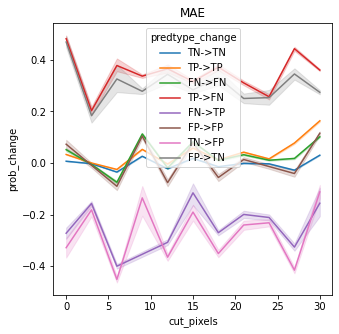

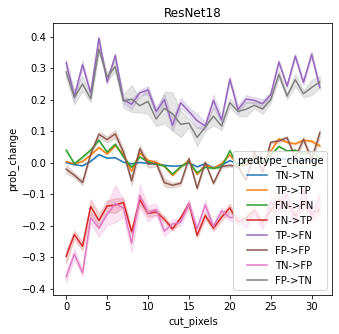

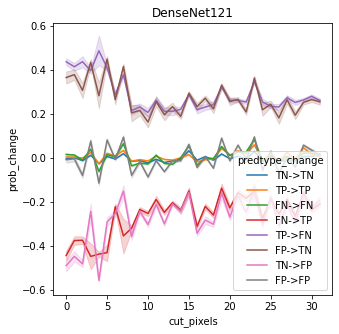

In [4]:
probs_model_all=[]
walking_change_all=[]
for model in models:
    df_probs, df_walking=plot_walkingchange(model, hue='predtype_change')
    probs_model_all.append(df_probs)
    walking_change_all.append(df_walking)

### Results transformation

In [5]:
changes_all=[]
for j, model in enumerate(models):
    walking_change_model=walking_change_all[j]
    ids = [walking_change_model[walking_change_model['cut_pixels']==0].index]*len(walking_change_model['cut_pixels'].unique())
    walking_change_model['index'] = np.concatenate(ids)
    changes = walking_change_model[['index', 'cut_pixels','predtype_change']].pivot(index='index', columns='cut_pixels').reset_index(drop=True)
    changes.columns = changes.columns.droplevel()
    for i in changes.columns:
        changes[i] = (~changes[i].str.contains('|'.join([x+'->'+x for x in ['TN', 'TP', 'FP', 'FN']]))).astype(int)
    changes_all.append(changes)

### Images with changing predictions

In [6]:
model_index=-1   # densenet
d=probs_model_all[model_index]
changes_sum = changes_all[model_index].sum(axis=1)
d[list(changes_sum> 16)].drop('label',axis=1) # the prediction changed more than 16 times

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
7162,0.845221,0.911976,0.965158,0.969705,0.899847,0.956697,0.856583,0.900021,0.562232,0.856615,...,0.340718,0.263972,0.513108,0.451001,0.677222,0.394445,0.316456,0.294292,0.784229,0.779342
13935,0.460145,0.652854,0.789100,0.959222,0.514040,0.839463,0.398391,0.718638,0.350175,0.463537,...,0.889559,0.476199,0.748363,0.634307,0.858742,0.373067,0.690922,0.323878,0.603998,0.510089
16723,0.495061,0.579782,0.433835,0.729330,0.145812,0.623263,0.168110,0.813770,0.217867,0.568489,...,0.632303,0.116846,0.505933,0.474032,0.744114,0.257929,0.159411,0.116603,0.277297,0.358619
18675,0.964100,0.924949,0.682308,0.625745,0.121076,0.633119,0.372395,0.534447,0.453677,0.840927,...,0.486781,0.605564,0.438012,0.530883,0.380157,0.305973,0.324854,0.275868,0.147214,0.088872


### The probability of the class tumour is shown in two cases

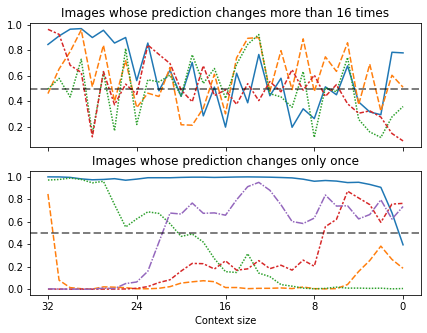

In [8]:
changing_probs_sample_images(probs_model_all, changes_all, model_index=-1)

### Number of images undergoing the change of prediction for the first time given the particular context size

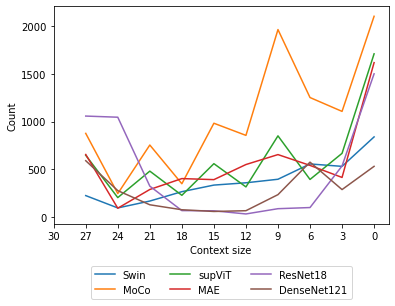

In [9]:
changes_sum_melt_all=plot_n_changes_context(changes_all)

### Number of images undergoing the change of prediction for the first time given the particular context size

pcamswin


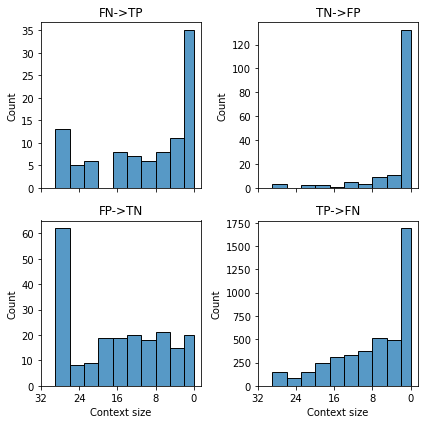

pcammoco


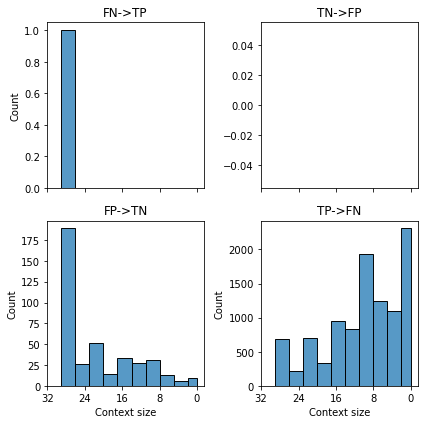

pcamsup


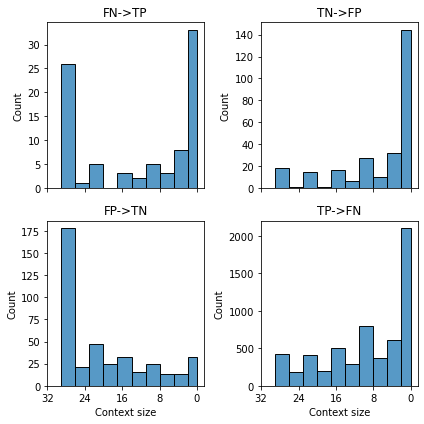

pcammae


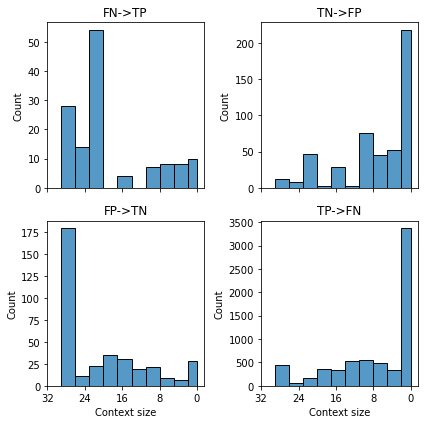

resnet18-pcam


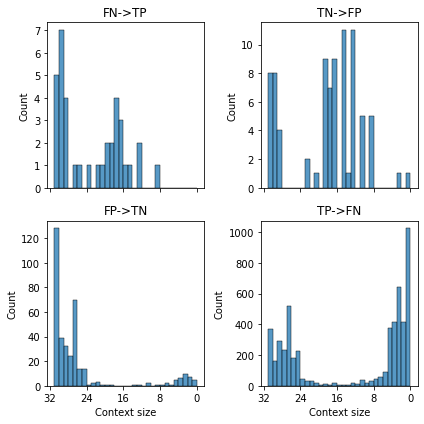

densenet121-pcam


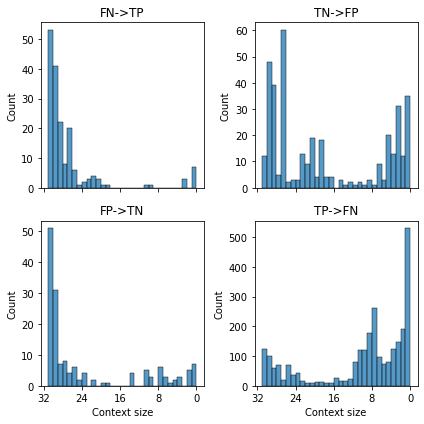

In [10]:
plot_histograms(walking_change_all, changes_sum_melt_all)

### The logarithm of the number of images that experience the particular number of prediction changes given particular model

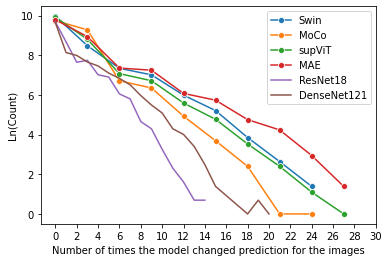

In [11]:
prediction_changes_per_images(changes_all)